In [112]:
import numpy as np
import matplotlib.pyplot as plt

In [113]:
advection = 5
alpha = 1/advection
xL = 0
xR = 1
yL = 0
yR = 1

i = 29 # number of colocation points
xi = np.linspace(xL, xR, i+2)
x = np.linspace(0,1,i)

#xi = xi[1:-1]

In [114]:
y_exact = yL + (yR-yL)*((1- np.exp(-x/alpha))/np.exp(-x/alpha) )/(1/np.exp(-1/alpha) - 1 )

Exact Plot


<function matplotlib.pyplot.show(close=None, block=None)>

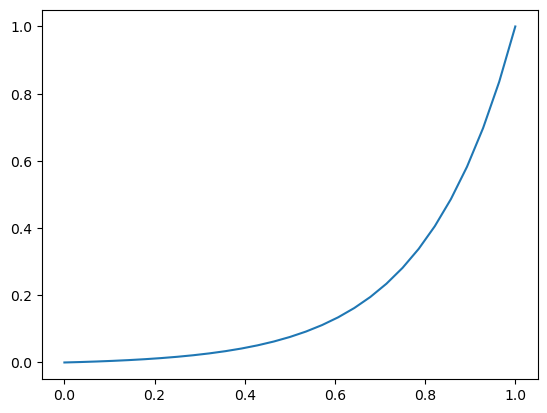

In [115]:
print("Exact Plot")
plt.plot(x, y_exact)
plt.show

In [116]:
"""
Initialization of matrix components, 
we are solving something of the form 
Ax = b, where A is our coefficient matrix,
x is the vector that we are solving for (the coefficients),
and y is the output vector
"""

#Write Code for n number of tanh functions, as well as J colocation points

n_tanh = 30
#This is the number of tanh functions we want in our system, the total size of the matrix will be this plus 1

A = np.zeros((i+2, n_tanh+1)) 
#The matrix A has i+2 rows for the 2 boundary values, and the i colocation points
#The matrix A has n+1 columns to fit the required amount of hyperbolic tangent functions, as well as the bias for the two boundary values

R_1_i = np.zeros(n_tanh)
R_2_i = np.zeros(n_tanh)
#These are matrices that store the random coefficients R_i that are put into the tanh function
#They have the same size as n_tanh because the random variable set for each column is the same

for j in range (n_tanh):
    #initialize random variable values
    R_1_i[j] = np.random.random()
    R_2_i[j] = np.random.random()
    
A[0, n_tanh] = 1
A[1, n_tanh] = 1
#Change the value for the boundary points to equal 1

#creates the first two rows through iteration
for j in range (i+2):
    for k in range(n_tanh):
        if(j<2):
            A[j][k] = np.tanh(R_1_i[k]*xi[j] + R_2_i[k])
        else:
            A[j][k] = (R_1_i[k] + alpha*(R_1_i[k]**2)*2*np.tanh(R_1_i[k]*xi[j] + R_2_i[k]))/((np.cosh(R_1_i[k]*xi[j] + R_2_i[k]))**2)
        
b_vector = np.zeros(i+2)
b_vector[0] = yL
b_vector[1] = yR

b_vector
#b_vector is our solution vector (i.e the y-values for the boundary values)



array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

[ 3.01938457e+09 -8.42077172e+10  2.35948853e+11  4.21476985e+11
  4.60094946e+12  7.76723098e+11  5.38561752e+10  1.92855891e+11
 -2.84582325e+10  2.03966631e+11 -1.41103505e+11  4.73495346e+10
  1.55099473e+10 -1.39168266e+11 -2.05769145e+11 -2.10585047e+11
 -8.67708775e+09  3.85525896e+08 -3.17859407e+11  3.34038952e+11
  1.78194321e+10 -5.64745423e+11 -3.87967533e+10 -1.93659410e+11
 -9.86565923e+09 -3.68915868e+10  3.19928682e+11 -3.03371590e+07
 -6.63154271e+11 -2.05091830e+11 -8.31867627e+11]


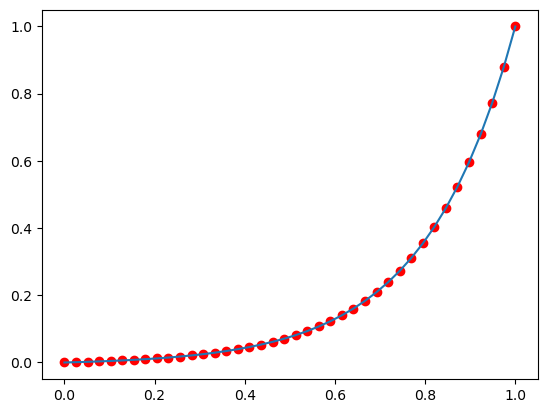

In [111]:
coeff = np.matmul(np.linalg.inv(A), b_vector)
print(coeff)

N = 40 # No of predictions
y_tanh = np.zeros(N)
x = np.linspace(xL, xR, N)
for ith in range(N):
#     y_tanh[ith] = 0
    for j in range(n_tanh):
        y_tanh[ith] = y_tanh[ith] + coeff[j] * np.tanh(R_1_i[j]*x[ith]+R_2_i[j])
    y_tanh[ith] = y_tanh[ith] + coeff[n_tanh]
#change the number of tanh functions inside

for ith in range(N):
    y_tanh[ith] = (y_tanh[ith]/y_tanh[N-1])

y_exact = yL + (yR-yL)*((1- np.exp(-x/alpha))/np.exp(-x/alpha) )/(1/np.exp(-1/alpha) - 1 )
plt.plot(x, y_tanh, 'ro')
plt.plot(x, y_exact)